# Week 12

In [1]:
## importing necessary libraries
import pandas as pd 
import lxml
from lxml import html
import requests

### Table of Contents

1. [What is web scraping](#bullet1)
2. [Importing tabular data from the web](#bullet2)
3. [Scraping HTML Text](#bullet3)
4. [Challenges and limitations with web scraping](#bullet4)

## 1. What is Web Scraping?  <a class="anchor" id="bullet1"></a>

The incredible amount of data on the Internet is a rich resource for any field of research or personal interest. To effectively harvest that data, you’ll need to become skilled at **web scraping**. 

This week, we'll learn how:  
- Decipher data encoded in URLs
- Use **requests** and **Beautiful Soup** for scraping and parsing data from the Web
- Step through a web scraping pipeline from start to finish
- Build a script that fetches job offers from the Web and displays relevant information in your console

Web scraping is the process of gathering information from the Internet. Even copying and pasting the lyrics of your favorite song is a form of web scraping! However, the words “web scraping” usually refer to a process that involves automation. 

**Some common reasons for web scraping**: 
- price monitoring: Sites like Kayak rely on web scraping to compile and compare prices found online.
- price and product intelligence: Use webscraping to keep an eye on competitor products, both the price and innovations. Watch the price of a particular good on a website like Amazon
- news monitoring
- lead generation: a google maps search to find local businesses, An AngelsList companies search, a LinkedIn search to find particular types of companies
- market research: Keep track of ever-changing trends
- brand monitoring: Review social media websites
- Search Engine Optimization (SEO): Gather insights into which keywords are better/used by your competition

<div class="alert alert-block alert-danger">
<b>Warning:</b> Be aware that some websites don’t like it when automatic scrapers gather their data, while others don’t mind. Some websites, like Twitter, explictly have policies against web scraping, preferring instead to have you access their data via an API.
    
  
    
If you’re scraping a page respectfully for educational purposes, then you’re unlikely to have any problems. Still, it’s a good idea to do some research on your own and make sure that you’re not violating any Terms of Service before you start a large-scale project.
</div>

## 2. Importing tabular data from the web <a class="anchor" id="bullet2"></a>

##### A. Importing csv files

See [this](https://catalog.data.gov/dataset) link for a list of datasets you can access online. We'll be using various datasets from this site to practice web scraping. 

For example, if we search for ["city of new york"](https://catalog.data.gov/dataset?q=city+of+new+york&sort=views_recent+desc&ext_location=&ext_bbox=&ext_prev_extent=-164.53125%2C-80.17871349622823%2C164.53125%2C80.17871349622823), we'll see the government makes all sorts of data publicly available. In fact, you can manually download some data directly via csv files. If you right click on the csv link, you can select "Copy link address". You then have a URL which you can use to download the data directly into Python.

For example, for the "Crime Data from 2020 to Present" dataset, the csv link is "https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD". To import this into Python, we need to modify it by dropping the part after ".csv".

In [2]:
url1 = "https://data.lacity.org/api/views/2nrs-mtv8/rows.csv"

In [3]:
## read in csv file
data1 = pd.read_csv(url1) 
data1.head()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)>

##### B. Importing html data tables 

Navigate to this [wikipedia](https://en.wikipedia.org/wiki/List_of_best-selling_music_artists) article. You'll notice there are multiple html tables there. *pandas* makes it pretty easy to import this data! This is nice, since it saves you time by not forcing you to access the data through the html structure.

In [4]:
url3 = 'https://en.wikipedia.org/wiki/List_of_best-selling_music_artists'

In [5]:
page = pd.read_html(url3)
print(type(page)) # this list contains all tables!
page[0].head()

<class 'list'>


,Artist,Country,Period active,Release-year of first charted record,Genre,Total certified units(from available markets)[b],Claimed sales
0,The Beatles,United Kingdom,1960–1970[11],1962[11],Rock / pop[11],.mw-parser-output .hidden-begin{box-sizing:bor...,600 million[43][44]500 million[45][46]
1,Michael Jackson,United States,1964–2009[47],1971[47],Pop / rock / dance / soul / R&B[47],286 million US: 177.3 million[12] JPN: 4.650 m...,500 million[45]400 million[64]
2,Elvis Presley,United States,1953–1977[65],1956[65],Rock and roll / pop / country[65],234.3 million US: 199.650 million[12] JPN: 300...,500 million[71]
3,Elton John,United Kingdom,1962–present[72],1970[72],Pop / rock[72],213.1 million US: 139.050 million[12] JPN: 1.1...,300 million[76][77]250 million[78][79]
4,Queen,United Kingdom,1971–present[80],1973[80],Rock[80],186.8 million US: 97.7 million[12] JPN: 3.8 mi...,300 million[83][84]250 million[85]


In [6]:
page[1].head()

,Artist,Country,Period active,Release-year of first charted record,Genre,Total certified units(from available markets)[b],Claimed sales
0,Eminem,United States,1996–present[119],1999[119],Hip-hop[119],336.45 million US: 242.7 million[12] JPN: 2.9 ...,220 million[120]
1,Mariah Carey,United States,1988–present[121],1990[121],R&B / pop / soul / hip-hop[121],222.72 million US: 163.3 million[12] JPN: 14.5...,220 million[125]
2,Whitney Houston,United States,1977–2012[126],1984[126],R&B / soul / pop / gospel[126],164.5 million US: 113.875 million[12] JPN: 4.3...,220 million[130]
3,Taylor Swift,United States,2006–present[131],2006[131],Pop / country / rock / folk / alternative[132],290.2 million US: 196 million[12] JPN: 3.3 mil...,200 million[133]170 million[134]
4,Beyoncé,United States,1997–present[135],2002[135][136],R&B / pop / hip-hop[135],245.2 million US: 176.330 million[12] JPN: 1.7...,200 million[140]160 million[141]


We'll look a little more at how pandas can help us scrap html tables from websites. We'll follow this [Source](https://pbpython.com/pandas-html-table.html).


The pandas `read_html()` function is a quick and convenient way to turn an HTML table into a pandas DataFrame. This function can be useful for quickly incorporating tables from various websites without figuring out how to scrape the site’s HTML. **However, there can be some challenges in cleaning and formatting the data before analyzing it.** Here, we look at how to use pandas `read_html()` to read and clean several Wikipedia HTML tables so that you can use them for further numeric analysis.

In [7]:
# This URL has 31 tables!
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')
print(type(table_MN))  # Saves tables in a list object for easy access
print(f'Total tables: {len(table_MN)}')

<class 'list'>
Total tables: 29


In [8]:
table_MN[2].head()

,Location,July (°F),July (°C),January (°F),January (°C)
0,Minneapolis,83/64,28/18,23/7,−4/−13
1,Saint Paul,83/63,28/17,23/6,−5/−14
2,Rochester,82/63,28/17,23/3,−5/−16
3,Duluth,76/55,24/13,19/1,−7/−17
4,St. Cloud,81/58,27/14,18/−1,−7/−18


With so many tables, it can be challenging to find the one you need. To make the table selection easier, use the match parameter to select a subset of tables. We can use the **table name “United States presidential election results for Minnesota”** to select the table:

In [9]:
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota', 
                        match='United States presidential election results for Minnesota')
len(table_MN)

1

In [10]:
df = pd.DataFrame(table_MN[0])
df.head()

Year Republican         Democratic         Third party       
   Year        No.       %        No.       %         No.      %
0  2020    1484065  45.28%    1717077  52.40%       76029  2.32%
1  2016    1323232  44.93%    1367825  46.44%      254176  8.63%
2  2012    1320225  44.96%    1546167  52.65%       70169  2.39%
3  2008    1275409  43.82%    1573354  54.06%       61606  2.12%
4  2004    1346695  47.61%    1445014  51.09%       36678  1.30%

In [11]:
df.info() # Notice the columns which read in with the '%' are not numeric!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   (Year, Year)        41 non-null     int64 
 1   (Republican, No.)   41 non-null     int64 
 2   (Republican, %)     41 non-null     object
 3   (Democratic, No.)   41 non-null     int64 
 4   (Democratic, %)     41 non-null     object
 5   (Third party, No.)  41 non-null     int64 
 6   (Third party, %)    41 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.4+ KB


In [12]:
df.columns # the columns have hierarchical indexing 

MultiIndex([(       'Year', 'Year'),
            ( 'Republican',  'No.'),
            ( 'Republican',    '%'),
            ( 'Democratic',  'No.'),
            ( 'Democratic',    '%'),
            ('Third party',  'No.'),
            ('Third party',    '%')],
           )

In [13]:
df[('Republican', '%')] = df[('Republican', '%')].replace({'%':''}, regex=True).astype('float') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Year, Year)        41 non-null     int64  
 1   (Republican, No.)   41 non-null     int64  
 2   (Republican, %)     41 non-null     float64
 3   (Democratic, No.)   41 non-null     int64  
 4   (Democratic, %)     41 non-null     object 
 5   (Third party, No.)  41 non-null     int64  
 6   (Third party, %)    41 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 2.4+ KB


In [14]:
df.head()

Year Republican        Democratic         Third party       
   Year        No.      %        No.       %         No.      %
0  2020    1484065  45.28    1717077  52.40%       76029  2.32%
1  2016    1323232  44.93    1367825  46.44%      254176  8.63%
2  2012    1320225  44.96    1546167  52.65%       70169  2.39%
3  2008    1275409  43.82    1573354  54.06%       61606  2.12%
4  2004    1346695  47.61    1445014  51.09%       36678  1.30%

## 3. Scraping HTML Text<a class="anchor" id="bullet3"></a>

Sources:
- [Real Python - Beautiful Soup: Build a Web Scraper With Python](https://realpython.com/beautiful-soup-web-scraper-python/) 

### An introduction to HTML (Hypertext Markup Langugage) structure

In [15]:
#First, need to know about HTML structure to be able to extract diff't parts of webpage

#HTML elements (i.e.-tags) structured in following manner:

#<tagname> content </tagname>

#---Examples of diff't kinds of tags that contain text:

#<h1>, <h2>,…,<h6>: Largest heading, second largest heading, etc.

#<p>: Paragraph elements

#<ul>: Unordered bulleted list

#<ol>: Ordered list

#<li>: Individual list item

#<div>: Division or section

#<table>: Table

#<thead>: table head

#<tbody>: table body

#<tr>: row of data in table 

##Example of tag structure for <p> paragraph tags

#<p>
#  This paragraph represents
# a typical text paragraph
# in HTML form
#</p>

We'll start by using `pandas` to read html from a string, and then move on to using `pandas` to read html from a URL.

In [16]:
html_string = """
<table>
  <thead>
    <tr>
      <th>date</th>
      <th>name</th>
      <th>year</th>
      <th>cost</th>
      <th>region</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2020-01-01</td>
      <td>Jenny</td>
      <td>1998</td>
      <td>0.2</td>
      <td>South</td>
    </tr>
    <tr>
      <td>2020-01-02</td>
      <td>Alice</td>
      <td>1992</td>
      <td>-1.34</td>
      <td>East</td>
    </tr>
    <tr>
      <td>2020-01-03</td>
      <td>Tomas</td>
      <td>1982</td>
      <td>1.00023</td>
      <td>South</td>
    </tr>
  </tbody>
</table>
"""

This html string has html code for a table:
- The `<thead> ~~~ </thead>` tagnames indicate a table header element
- The `<tbody> ~~~ </tbody>` tags indicate the body of the table, where each call represents a single record

In this case, there are **three** records. When we extract the tabular data from this html code, we should therefore see a table with three records, in addition to the table header. 

This is what the `pd.read_html()` function actually does - it imports a list of all tables by parsing the html code.

In [17]:
dfs = pd.read_html(html_string)
pd.DataFrame(dfs[0])

,date,name,year,cost,region
0,2020-01-01,Jenny,1998,0.20000,South
1,2020-01-02,Alice,1992,-1.34000,East
2,2020-01-03,Tomas,1982,1.00023,South


<div class="alert alert-block alert-info">
<b>Note:</b> Keep in mind that every website will look different. That’s why it’s necessary to inspect and understand the structure of the site you’re currently working with before moving forward.</div>

### Scraping HTML content from a web page

##### Step 1: Inspect the data source

Before we write any Python code, we need to get to know the website that we want to scrape. That should be our first step for any web scraping project. We’ll need to understand the site structure to extract the information that’s relevant for us. Start by opening [the site we want to scrape](https://realpython.github.io/fake-jobs/) with our favorite browser.

**Explore the website**
Click through the site and interact with it just like any typical job searcher would. For example, we can scroll through the main page of the website:

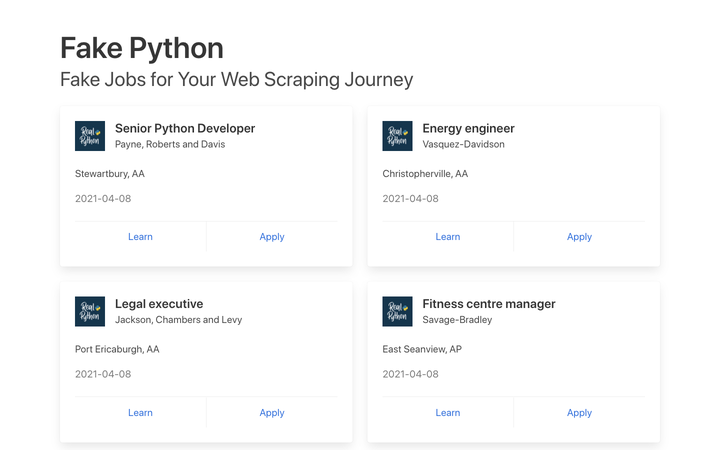

We can see many job postings in a card format, and each of them has two buttons. If we click Apply, then we’ll see a new page that contains more detailed descriptions of the selected job. We might also notice that the URL in our browser’s address bar changes when we interact with the website.

**Decipher the Information in URLs**
A programmer can encode a lot of information in a URL. Our web scraping journey will be much easier if we first become familiar with how URLs work and what they’re made of. For example, we might find a details page that has the following URL:

https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html

We can deconstruct the above URL into two main parts:

1. **The base URL** represents the path to the search functionality of the website. In the example above, the base URL is https://realpython.github.io/fake-jobs/.
2. The **specific site location** that ends with .html is the path to the job description’s unique resource.


Any job posted on this website will use the same base URL. However, the unique resources’ location will be different depending on what specific job posting we’re viewing.

URLs can hold more information than just the location of a file. Some websites use **query parameters** to encode values that we submit when performing a search. We can think of them as query strings that we send to the database to retrieve specific records.

We’ll find query parameters at the end of a URL. For example, if we go to Indeed and search for “software developer” in “Australia” through their search bar, we’ll see that the URL changes to include these values as query parameters:

https://au.indeed.com/jobs?q=software+developer&l=Australia

The query parameters in this URL are ?q=software+developer&l=Australia. Recall that last week we saw this same query structure when we made calls to the NY Time API. Query parameters consist of three parts:

1. **Start**: The beginning of the query parameters is denoted by a question mark (?).
2. **Information**: The pieces of information constituting one query parameter are encoded in key-value pairs, where related keys and values are joined together by an equals sign (key=value).
3. **Separator**: Every URL can have multiple query parameters, separated by an ampersand symbol (&).

Equipped with this information, we can pick apart the URL’s query parameters into two key-value pairs:

`q=software+developer` selects the type of job.
`l=Australia` selects the location of the job.

Armed with this type of information, it's easy to imagine how we would manipulate URLs on some websites to scrape data. However, we cannot take advantage of this trick when we scrape the [Fake Python Jobs](https://realpython.github.io/fake-jobs/) webpage because this site is a purely static website that doesn’t operate on top of a database, which is why we won’t have to work with query parameters in this scraping tutorial.

**Inspect the Site Using Developer Tools**

**Developer tools** can help us understand the structure of a website. All modern browsers come with developer tools installed. In this section, we’ll see how to work with the developer tools in Chrome. The process will be very similar to other modern browsers.

In **Chrome on macOS**, we can open up the developer tools through the menu by `selecting View → Developer → Developer Tools`. On **Windows and Linux**, we can access them by clicking the `top-right menu button (⋮) and selecting More Tools → Developer Tools`. We can also access our developer tools by right-clicking on the page and selecting the Inspect option or using a keyboard shortcut (F12 on Windows).

Developer tools allow us to interactively explore the site’s **document object model (DOM)** to better understand our source. The DOM is (in simplified terms) **a visual representation of the HTML that makes up a web page**. To dig into our page’s DOM, select the Elements tab in developer tools. We’ll see a structure with clickable HTML elements. We can expand, collapse, and even edit elements right in our browser. We can think of the text displayed in our browser as the HTML structure of that page. 

<div class="alert alert-block alert-success">
<b>Explore:</b> We'll take a few minutes to explore HTML code on this, or other, web pages. Ask any questions we have, and point out any observations you make once we come back as a class.
</div>

##### Step 2: Scrape HTML Content From a Page

First, we need to issue an HTTP `GET` request, which we do with the `requests` module. The code below retrieves the HTML data from the server and sends back and stores that data as a Python object.

In [18]:
import requests

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

In [19]:
print(type(page))
#print(page.text)  # html code takes up a lot of space!

<class 'requests.models.Response'>


If we inspect the `.text` attribute of *page*, then we'll notice that it looks just like the HTML that we inspected earlier with the developer's tool in the browser we were using. At this point, we've fetched static site content from the internet! Now we can extract the relevant information.

**Static Websites**  
The website that we’re scraping in this tutorial serves static HTML content. In this scenario, the server that hosts the site sends back HTML documents that already contain all the data that we’ll get to see as a user. When we inspected the page with developer tools earlier on, we discovered that a job posting consists of the following long and messy-looking HTML:

In [20]:
URL2 = "https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html"
page2 = requests.get(URL2)
print(page2.text) 

<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Fake Python</title>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">
  </head>
  <body>
  <section class="section">
    <div class="container mb-5">
      <h1 class="title is-1">
        Fake Python
      </h1>
      <p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
    </div>
    <div class="container">
    <div id="ResultsContainer" class="columns is-multiline">
    <div class="box">
<h1 class="title is-2">Senior Python Developer</h1>
<h2 class="subtitle is-4 company">Payne, Roberts and Davis</h2>
<div class="content">
    <p>Professional asset web application environmentally friendly detail-oriented asset. Coordinate educational dashboard agile employ growth opportunity. Company programs CSS explore role. Html educational grit web application. Oversea SCRUM talent

It can be challenging to wrap your head around a long block of HTML code. To make it easier to read, we can use an [HTML formatter](https://webformatter.com/html) to clean it up automatically. Good readability helps you better understand the structure of any code block. While it may or may not help improve the HTML formatting, it’s always worth a try.

The HTML we’ll encounter will sometimes be confusing. Luckily, the HTML of this job board has descriptive class names for the elements that we’re interested in:

- class="title is-5" contains the title of the job posting
- class="subtitle is-6 company" contains the name of the company that offers the position
- class="location" contains the location 

In case we ever get lost in a large pile of HTML, remember that we can always go back to our browser and use the developer tools to further explore the HTML structure interactively.

By now, we’ve successfully harnessed the power and user-friendly design of Python’s requests library. With only a few lines of code, we managed to scrape static HTML content from the Web and make it available for further processing.

However, there are more challenging situations that we might encounter when we’re scraping websites. Before we learn how to pick the relevant information from the HTML that we just scraped, we’ll take a quick look at two of these more challenging situations.

**Hidden Websites**  
Some pages contain information that’s hidden behind a login. That means we’ll need an account to be able to scrape anything from the page. The process to make an HTTP request from our Python script is different from how we access a page from our browser. Just because we can log in to the page through our browser doesn’t mean we’ll be able to scrape it with our Python script.

However, the **requests library comes with the built-in capacity to handle authentication**. With these techniques, we can log in to websites when making the HTTP request from our Python script and then scrape information that’s hidden behind a login. We won’t need to log in to access the job board information, which is why this tutorial won’t cover authentication.

**Dynamic Websites**  
We use the term dynamic website to refer to a website that doesn’t return the same HTML that we see when viewing the page in our browser. Static sites are straightforward to work with because the server sends us an HTML page that already contains all the page information in the response. We can parse that HTML response and immediately begin to pick out the relevant data.

On the other hand, with a dynamic website, the server might not send back any HTML at all. Instead, we could receive JavaScript code as a response. This code will look completely different from what we saw when we inspected the page with our browser’s developer tools. 

Many modern web applications are designed to provide their functionality in collaboration with the clients’ browsers. **Instead of sending HTML pages, these apps send JavaScript code that instructs our browser to create the desired HTML.** Web apps deliver dynamic content in this way to offload work from the server to the clients’ machines as well as to avoid page reloads and improve the overall user experience.

What happens in the browser is not the same as what happens in our script. Our browser will diligently execute the JavaScript code it receives from a server and create the DOM and HTML locally. However, **if we request a dynamic website in our Python script, then we won’t get the HTML page content.**

When we use requests, we only receive what the server sends back. In the case of a dynamic website, we’ll end up with some JavaScript code instead of HTML. The only way to go from the JavaScript code we received to the content that we’re interested in is to execute the code, just like our browser does. The *requests* library can’t do that for us, but there are other solutions that can. For example, *requests-html* is a project created by the author of the *requests* library that allows us to render JavaScript using syntax that’s similar to the syntax in requests. It also includes capabilities for parsing the data by using Beautiful Soup under the hood.

We won’t go deeper into scraping dynamically-generated content in this tutorial. For now, it’s enough to remember to look into one of the options mentioned above if you need to scrape a dynamic website.

##### Step 3: Parse HTML Code With Beautiful Soup

We’ve successfully scraped some HTML from the Internet, but when we look at it, it just seems like a huge mess. There are tons of HTML elements here and there, thousands of attributes scattered around—and wasn’t there some JavaScript mixed in as well? It’s time to parse this lengthy code response with the help of Python to make it more accessible and pick out the data we want.

`Beautiful Soup` is a Python library for parsing structured data. It allows you to interact with HTML in a similar way to how you interact with a web page using developer tools. The library exposes a couple of intuitive functions you can use to explore the HTML you received.

In [22]:
import requests
from bs4 import BeautifulSoup

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)
print(type(page))

soup = BeautifulSoup(page.content, "html.parser")  # notice how BeautifulSoup works with requests objects ! 
print(type(soup))

<class 'requests.models.Response'>
<class 'bs4.BeautifulSoup'>


Above, we created a *Beautiful Soup* object that takes `page.content`, which is the HTML content we scraped earlier, as its input. The second argument, `html.parser`, makes sure that we use the appropriate parser for HTML content.

<div class="alert alert-block alert-info">
<b>Note:</b> We’ll want to pass `page.content` instead of `page.text` to avoid problems with character encoding. The `.content` attribute holds raw bytes, which can be decoded better than the text representation we printed earlier using the `.text` attribute.</div>

**Find Elements by ID**


In an HTML web page, every element can have an id attribute assigned. As the name already suggests, that id attribute makes the element uniquely identifiable on the page. We can begin to parse a page by selecting a specific element by its ID.

**Challenge**: Switch back to developer tools and identify the HTML object that contains all the job postings. Explore by hovering over parts of the page and using right-click to Inspect.

Take a minute and see if you can answer this question! The element we are looking for should be the parent of all HTML objects with job posting information.


The element we’re looking for is a `<div>` tag with an id attribute that has the value "ResultsContainer". It has some other attributes as well, but below is the gist of what we’re looking for:

In [ ]:
<div id="ResultsContainer">
  <!-- all the job listings -->
</div>

*Beautiful Soup* allows us to find that specific HTML element by its ID:

In [28]:
results = soup.find(id="ResultsContainer")
#results   # Commented out bc it is so long ! 
#print(results.prettify())

For easier viewing, we can prettify any *Beautiful Soup* object when we print it out. If we call `.prettify()` on the results variable that we just assigned above, then we’ll see all the HTML contained within the `<div>`:

**Find Elements by HTML Class Name**  
We’ve seen that every job posting is wrapped in a `<div>` element with the class card-content. Now you can work with your new object called results and select only the job postings in it. These are, after all, the parts of the HTML that you’re interested in! You can do this in one line of code:

In [29]:
job_elements = results.find_all("div", class_="card-content")

Here, we call `.find_all()` on a *Beautiful Soup* object, which returns an **iterable** containing all the HTML for all the job listings displayed on that page. Take a look at all of them:

In [ ]:
for job_element in job_elements:
    print(job_element, end="\n"*2)

That’s already pretty neat, but there’s still a lot of HTML! We saw earlier that our page has descriptive class names on some elements. We can pick out those child elements from each job posting with `.find()`:

In [ ]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element)
    print(company_element)
    print(location_element)
    print()

Each `job_element` is another `BeautifulSoup()` object. Therefore, we can use the same methods on it as we did on its parent element, results.

With this code snippet, we’re getting closer and closer to the data that we’re actually interested in. Still, there’s a lot going on with all those HTML tags and attributes floating around:

In [ ]:
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
<p class="location">Stewartbury, AA</p>

**Extract Text From HTML Elements**  
We only want to see the title, company, and location of each job posting. And behold! *Beautiful Soup* has got us covered. We can add `.text` to a *Beautiful Soup* object to return only the text content of the HTML elements that the object contains:

In [ ]:
for job_element in job_elements: 
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()

**Find Elements by Class Name and Text Content**  
Not all of the job listings are developer jobs. Instead of printing out all the jobs listed on the website, we’ll first filter them using keywords. Let's suppose that we want to filter out jobs based on whether they are "Python" jobs.

We know that job titles in the page are kept within `<h2>` elements. To filter for only specific jobs, we can use the string argument:

In [37]:
python_jobs = results.find_all("h2", string="Python")
python_jobs

[]

There was a Python job in the search results, so why is it not showing up?

When we use `string=` as we did above, our program looks for that string exactly. Any differences in the spelling, capitalization, or whitespace will prevent the element from matching. 

Let's find a way to make our search string more general.

In [39]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)
python_jobs

[<h2 class="title is-5">Senior Python Developer</h2>,
 <h2 class="title is-5">Software Engineer (Python)</h2>,
 <h2 class="title is-5">Python Programmer (Entry-Level)</h2>,
 <h2 class="title is-5">Python Programmer (Entry-Level)</h2>,
 <h2 class="title is-5">Software Developer (Python)</h2>,
 <h2 class="title is-5">Python Developer</h2>,
 <h2 class="title is-5">Back-End Web Developer (Python, Django)</h2>,
 <h2 class="title is-5">Back-End Web Developer (Python, Django)</h2>,
 <h2 class="title is-5">Python Programmer (Entry-Level)</h2>,
 <h2 class="title is-5">Software Developer (Python)</h2>]

In [40]:
python_jobs[0].text.strip()

'Senior Python Developer'

Now we’re passing an **anonymous function** to the `string=` argument. The **lambda function** looks at the text of each `<h2>` elements, converts it to lowercase, and checks whether the substring "python" is found anywhere. 

In [41]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)

for job_element in python_jobs:
    print(job_element.text.strip())

Senior Python Developer
Software Engineer (Python)
Python Programmer (Entry-Level)
Python Programmer (Entry-Level)
Software Developer (Python)
Python Developer
Back-End Web Developer (Python, Django)
Back-End Web Developer (Python, Django)
Python Programmer (Entry-Level)
Software Developer (Python)


**Accessing Parent Elements**

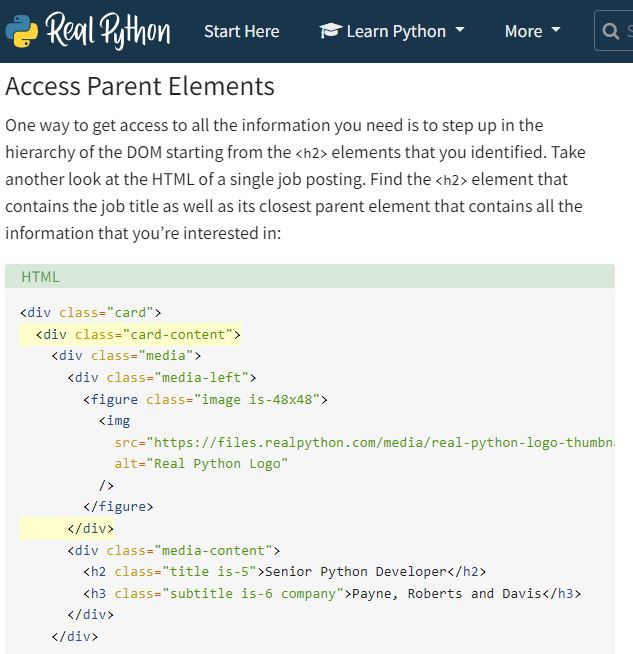

The `<div>` element with the card-content class contains all the information we want. It’s a third-level parent of the `<h2>` title element that we found using our filter.

With this information in mind, we can now use the elements in `python_jobs` and fetch their **great-grandparent elements** instead to get access to all the information we want:

In [44]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)

python_job_elements = [ h2_element.parent.parent.parent for h2_element in python_jobs ]

We added a list comprehension that operates on each of the `<h2>` title elements in `python_jobs` that you got by filtering with the lambda expression. We’re selecting the parent element of the parent element of the parent element of each `<h2>` title element. That’s three generations up!

When we were looking at the HTML of a single job posting, we identified that this specific parent element with the class name card-content contains all the information we need. Now we can adapt the code in your for loop to iterate over the parent elements instead:

In [82]:
# this time, we loop through the <div class="card-content"> elements instead of just the <h2> title elements
for job_element in python_job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()

Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA

Software Engineer (Python)
Garcia PLC
Ericberg, AE

Python Programmer (Entry-Level)
Moss, Duncan and Allen
Port Sara, AE

Python Programmer (Entry-Level)
Cooper and Sons
West Victor, AE

Software Developer (Python)
Adams-Brewer
Brockburgh, AE

Python Developer
Rivera and Sons
East Michaelfort, AA

Back-End Web Developer (Python, Django)
Stewart-Alexander
South Kimberly, AA

Back-End Web Developer (Python, Django)
Jackson, Ali and Mckee
New Elizabethside, AA

Python Programmer (Entry-Level)
Mathews Inc
Robertborough, AP

Software Developer (Python)
Moreno-Rodriguez
Martinezburgh, AE



<div class="alert alert-block alert-info">
<b>Tip:</b> Using the `.parent` attribute that each Beautiful Soup object comes with gives you an intuitive way of stepping through your DOM structure and addressing the elements you need. You can also access child elements and sibling elements in a similar manner. Read up on navigating the tree for more information. </div>


**Extract links for job applications you are interested in!**  
The URL of a link element is associated with the `href` attribute. The specific URL that you’re looking for is the value of the `href` attribute of the second `<a>` tag at the bottom of the HTML text.

In [ ]:
<!-- snip -->
    <footer class="card-footer">
        <a href="https://www.realpython.com" target="_blank"
           class="card-footer-item">Learn</a>
        <a href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html"
           target="_blank"
           class="card-footer-item">Apply</a>
    </footer>
  </div>
</div>

In this code snippet, you first fetched all links from each of the filtered job postings. Then you extracted the `href` attribute, which contains the URL, using `["href"]` and printed it to your console.

In [89]:
for job_element in python_job_elements:
    # -- snip --
    links = job_element.find_all("a")
    for link in links:
        link_url = link["href"]
        print(f"Apply here: {link_url}\n")

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/python-developer-50.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-60.html

Apply here: https://www.realpython.com

Apply here: https://realpython.github

## 4. Challenges and limitations with web scraping <a class="anchor" id="bullet4"></a>

Web scraping can be an incredibly useful tool for gathering data from websites, but it can also present some significant challenges. Here are some of the biggest problems that you might encounter when web scraping:

1. **Website structure changes**: Websites are constantly changing, which means that the structure of the website you are scraping may change as well. This can cause problems with your scraper, as it may no longer be able to find the data it needs. To overcome this, you will need to continuously monitor the website and adjust your scraper accordingly.

2. **Captchas and other anti-scraping measures**: Many websites have implemented measures to prevent web scrapings, such as captchas and IP blocking. This can make it difficult or impossible to scrape the website without being detected. To avoid this, you may need to use a proxy server or rotate IP addresses to avoid being blocked.

3. **Large datasets**: When scraping large datasets, you may run into issues with memory and processing power. This can slow down your scraper or cause it to crash. To mitigate this, you may need to break up your scraping into smaller chunks or use a distributed scraping system.

4. **Data quality**: The data you scrape may not always be accurate or complete. This can be due to errors in the website or issues with your scraper. To ensure that you are getting high-quality data, you will need to perform data cleaning and validation.

5. **Legal issues**: Web scraping may be illegal or violate the terms of service of the website you are scraping. This can lead to legal action against you or your organization. To avoid legal issues, it is important to research the legality of web scraping in your jurisdiction and obtain permission from the website owner if necessary.

Overall, web scraping can be a powerful tool for gathering data, but it requires careful planning and execution to overcome the challenges that come with it. By addressing these issues head-on, you can ensure that your web scraping efforts are successful and produce high-quality data.